In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                 transform=transforms.Compose([
                     transforms.ToTensor(),
                 ])),
    batch_size=1)

In [4]:
image, label = next(iter(train_loader))

In [5]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

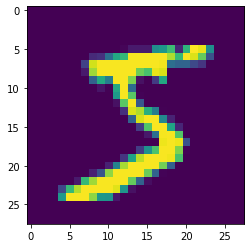

In [6]:
plt.imshow(image[0,0,:,:])
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

# channel 지정 필요 : gray는 1, color는 3

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [9]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [10]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [11]:
# detach() - 파이토치는 detach를 사용해서 꺼내줘야 numpy화가 가능하다.

weight = weight.detach().numpy()

In [12]:
weight.shape

(20, 1, 5, 5)

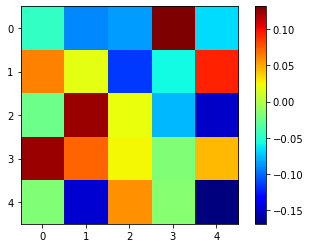

In [13]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [14]:
output_data = layer(image)

In [15]:
# 데이터 화를 한 것이다.

output_data = output_data.data

In [16]:
output = output_data.cpu().numpy()

In [17]:
output.shape

(1, 20, 24, 24)

In [18]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

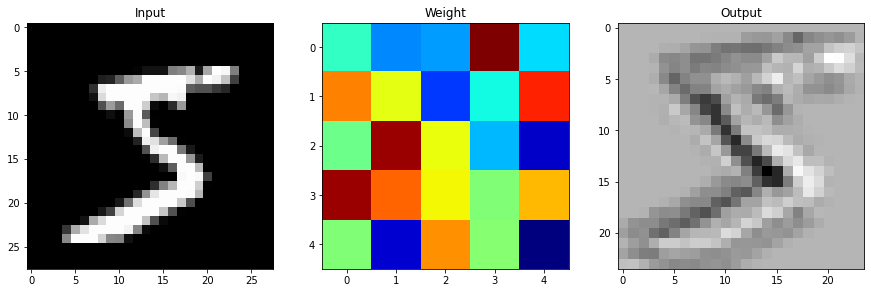

In [19]:
plt.figure(figsize=(15,30))
plt.subplot(131) # 1이 있으니까 squeeze 해주어야한다. (4차원이자나)
plt.title('Input')
plt.imshow(np.squeeze(image_arr),'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0,0,:,:],'gray')
plt.show()

In [20]:
image.shape

torch.Size([1, 1, 28, 28])

In [21]:
# nn은 weight가 있는거
# F는 max_polling 같은거

pool = F.max_pool2d(image, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

In [32]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [33]:
image_arr.shape

(1, 1, 28, 28)

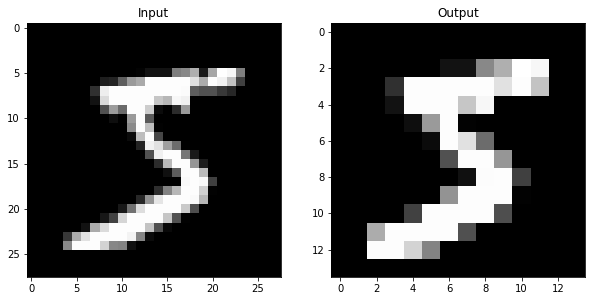

In [34]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(np.squeeze(image_arr),'gray') 
plt.subplot(122)
plt.title("Output")
plt.imshow(np.squeeze(pool_arr),'gray')
plt.show()

In [35]:
image.shape

torch.Size([1, 1, 28, 28])

In [37]:
# 1차원으로 들어간다.

flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [38]:
lin = nn.Linear(784,10)(flatten)
lin.shape

# 784로 받고 10개로 내보낸다.

torch.Size([1, 10])

In [39]:
lin

tensor([[-0.2143,  0.1428,  0.0774, -0.2100, -0.0099,  0.1168,  0.2244, -0.0303,
          0.6877, -0.3276]], grad_fn=<AddmmBackward>)

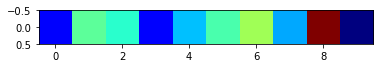

In [40]:
plt.imshow(lin.detach().numpy(),'jet')
# 웨이트가 있으면 detach를 해주어야 한다.
plt.show()

In [41]:
with torch.no_grad(): # 학습모드일 경우일 경우 no_grad()를 필수!!!
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [42]:
softmax

tensor([[0.0924, 0.0878, 0.1227, 0.1170, 0.1208, 0.1048, 0.1010, 0.0946, 0.0996,
         0.0592]])

In [43]:
np.sum(softmax.numpy())

1.0000001

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # weight가 있는 것들
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        # Feature Extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        #Fully Connected (Classification)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [31]:
model = Net()

In [32]:
result = model.forward(image)

In [33]:
result

tensor([[-2.3029, -2.2419, -2.2782, -2.3079, -2.2748, -2.3756, -2.2555, -2.3406,
         -2.2952, -2.3618]], grad_fn=<LogSoftmaxBackward>)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))